# Assignment 01
## Tasks 
#### 1. convert the complete text to lower case.
#### 2. remove all the stop words.
#### 3. Apply POS tagging on the whole text
#### 4. Lemmatize the most frequently occurring 5 adjectives
#### 5. Stem the least frequently occurring 5 verbs.
#### 6. Show the concordance for a word of your choice.
#### 7. Draw the dispersion plot for 2 frequently occurring terms in the document.

In [31]:
# Import Libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import FreqDist # counting the word occurrence using FreqDist library
from nltk.stem import WordNetLemmatizer #is based on The Porter Stemming Algorithm

In [32]:
# Reading Text File 
data = open("KhemSinghBedi.txt", "r")
corpus = data.read()
print(corpus)

Khem Singh Bedi was born in Kallar Syedan in the Rawalpindi District in 1832. He claimed to be the thirteenth direct descendant of Guru Nanak Dev, the founder of Sikhism.[3] His father Baba Attar Singh was killed in a family feud on 25 November 1839 and Bedi and his elder brother Sampuran Singh inherited jagirs in the Doaba region along with 41 villages in Depalpur Tehsil. Bedi held his jagirs in 4 villages of Dipalpur tahsil, while his elder brother was given jagirs in 22 villages of the same tahsil.[4] Following the annexation of the Punjab by the East India Company in 1849, 14 of those villages were appropriated by the new administration.[5]

In 1855, the Punjab administration established the Department of Public Instruction with the aim to open 30 single-teacher primary schools across the Punjab. Bedi lent his full support to the scheme, additionally opening his own schools in Rawalpindi. At least fifty schools for boys and girls were opened in the Punjab with his assistance.[5]

D

### 1. convert the complete text to lower case.

In [33]:
lower_text = corpus.lower()
print (lower_text)

khem singh bedi was born in kallar syedan in the rawalpindi district in 1832. he claimed to be the thirteenth direct descendant of guru nanak dev, the founder of sikhism.[3] his father baba attar singh was killed in a family feud on 25 november 1839 and bedi and his elder brother sampuran singh inherited jagirs in the doaba region along with 41 villages in depalpur tehsil. bedi held his jagirs in 4 villages of dipalpur tahsil, while his elder brother was given jagirs in 22 villages of the same tahsil.[4] following the annexation of the punjab by the east india company in 1849, 14 of those villages were appropriated by the new administration.[5]

in 1855, the punjab administration established the department of public instruction with the aim to open 30 single-teacher primary schools across the punjab. bedi lent his full support to the scheme, additionally opening his own schools in rawalpindi. at least fifty schools for boys and girls were opened in the punjab with his assistance.[5]

d

### 2. remove all the stop words.

In [34]:
## Filtering Stop Words
nltk.download("stopwords") #download stopwords corpus from NLTK
stop_words = set(stopwords.words("english")) # setting ENGLISH as dictionary for stop words
word_tokens = nltk.word_tokenize(lower_text) # word tokenziation
removing_stopwords = [word for word in word_tokens if word not in stop_words]
print (removing_stopwords)

['khem', 'singh', 'bedi', 'born', 'kallar', 'syedan', 'rawalpindi', 'district', '1832.', 'claimed', 'thirteenth', 'direct', 'descendant', 'guru', 'nanak', 'dev', ',', 'founder', 'sikhism', '.', '[', '3', ']', 'father', 'baba', 'attar', 'singh', 'killed', 'family', 'feud', '25', 'november', '1839', 'bedi', 'elder', 'brother', 'sampuran', 'singh', 'inherited', 'jagirs', 'doaba', 'region', 'along', '41', 'villages', 'depalpur', 'tehsil', '.', 'bedi', 'held', 'jagirs', '4', 'villages', 'dipalpur', 'tahsil', ',', 'elder', 'brother', 'given', 'jagirs', '22', 'villages', 'tahsil', '.', '[', '4', ']', 'following', 'annexation', 'punjab', 'east', 'india', 'company', '1849', ',', '14', 'villages', 'appropriated', 'new', 'administration', '.', '[', '5', ']', '1855', ',', 'punjab', 'administration', 'established', 'department', 'public', 'instruction', 'aim', 'open', '30', 'single-teacher', 'primary', 'schools', 'across', 'punjab', '.', 'bedi', 'lent', 'full', 'support', 'scheme', ',', 'additional

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KHEEM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 3. Apply POS tagging on the whole text

In [35]:
pos_tag = nltk.pos_tag(removing_stopwords)
print (pos_tag)

[('khem', 'NN'), ('singh', 'NN'), ('bedi', 'NN'), ('born', 'VBN'), ('kallar', 'JJ'), ('syedan', 'NN'), ('rawalpindi', 'NN'), ('district', 'NN'), ('1832.', 'CD'), ('claimed', 'VBD'), ('thirteenth', 'JJ'), ('direct', 'JJ'), ('descendant', 'NN'), ('guru', 'NN'), ('nanak', 'NN'), ('dev', 'NN'), (',', ','), ('founder', 'NN'), ('sikhism', 'NN'), ('.', '.'), ('[', 'CC'), ('3', 'CD'), (']', 'NN'), ('father', 'NN'), ('baba', 'NN'), ('attar', 'NN'), ('singh', 'NN'), ('killed', 'VBD'), ('family', 'NN'), ('feud', 'NN'), ('25', 'CD'), ('november', 'NN'), ('1839', 'CD'), ('bedi', 'NN'), ('elder', 'NN'), ('brother', 'NN'), ('sampuran', 'VBD'), ('singh', 'RB'), ('inherited', 'VBN'), ('jagirs', 'NNS'), ('doaba', 'JJ'), ('region', 'NN'), ('along', 'IN'), ('41', 'CD'), ('villages', 'NNS'), ('depalpur', 'JJ'), ('tehsil', 'NN'), ('.', '.'), ('bedi', 'JJ'), ('held', 'VBD'), ('jagirs', 'NNS'), ('4', 'CD'), ('villages', 'NNS'), ('dipalpur', 'JJ'), ('tahsil', 'NN'), (',', ','), ('elder', 'VB'), ('brother', 'NN

### 4. Lemmatize the most frequently occurring 5 adjectives

In [37]:
# removing punctuations 
import string
from nltk import word_tokenize
from collections import Counter
text_punc = "".join([char for char in lower_text if char not in string.punctuation])
wordss = word_tokenize(text_punc)
filtered_text = [word for word in wordss if word not in stop_words]
POS_punc =  nltk.pos_tag(filtered_text)
fdist = nltk.FreqDist(POS_punc)
counts = Counter( tag for word,  tag in POS_punc)
print(counts)
aa = [wt[0] for (wt, _) in fdist.most_common() if wt[1] == 'JJ']
mostADJ = print(aa[0:6])

porter_stemmer  = PorterStemmer()
text = "indian punjab kallar thirteenth direct nanak"
tokenization = nltk.word_tokenize(text)
for w in tokenization:
    print("Stemming for {} is {}".format(w,porter_stemmer.stem(w)))

Counter({'NN': 110, 'JJ': 48, 'CD': 26, 'VBD': 25, 'NNS': 22, 'VBN': 10, 'VBP': 10, 'VBG': 10, 'RB': 8, 'IN': 4, 'JJS': 1, 'VBZ': 1, 'VB': 1, 'RBR': 1})
['indian', 'punjab', 'kallar', 'thirteenth', 'direct', 'nanak']
Stemming for indian is indian
Stemming for punjab is punjab
Stemming for kallar is kallar
Stemming for thirteenth is thirteenth
Stemming for direct is direct
Stemming for nanak is nanak


### 5. Stem the least frequently occurring 5 verbs.

In [16]:
count=0
lst=[]
#Sorting the tags on the basis of there counts and taking only first 5 tags least occured words which are verbs
for i in sorted(pos_tag,key=pos_tag.count):
    if i[1] == 'VBD':
        if i[0] not in lst:
            lst.append(i[0])
            count+=1
    if count == 5:
        break

In [17]:
# Top 5 tags
lst

['claimed', 'killed', 'sampuran', 'held', 'appropriated']

In [38]:
porter_stemmer  = PorterStemmer()
#Words and their Stemmed forms
for i in lst:
    print("Stemming for {} is  \033[1m{}\033[0;0m".format(i,porter_stemmer.stem(i)))  

Stemming for claimed is  claim
Stemming for killed is  kill
Stemming for sampuran is  sampuran
Stemming for held is  held
Stemming for appropriated is  appropri


### 6. Show the concordance for a word of your choice.

In [22]:
from nltk.corpus import gutenberg
from nltk.text import Text

texts = Text(text_punc.split())
#  concordance for a word Osama
texts.concordance("singh")

Displaying 5 of 5 matches:
khem singh bedi was born in kallar syedan in th
er of sikhism3 his father baba attar singh was killed in a family feud on 25 no
 bedi and his elder brother sampuran singh inherited jagirs in the doaba region
5 on 1 october 1873 he cofounded the singh sabha movement in response to growin
 who seek one which resulted in khem singh bedi considering himself the guru7 t


### 7. Draw the dispersion plot for 2 frequently occurring terms in the document.

In [23]:
lst2=[]
c=0
# Getting Top 2 most Frequently occuring words
for i in sorted(pos_tag,key=pos_tag.count,reverse=True):
    if i[0] not in ',,.;:/[!@#$%^&*():""]':
        if i[0] not in lst2:
            lst2.append(i[0])
            c+=1
            if c==2:
                break

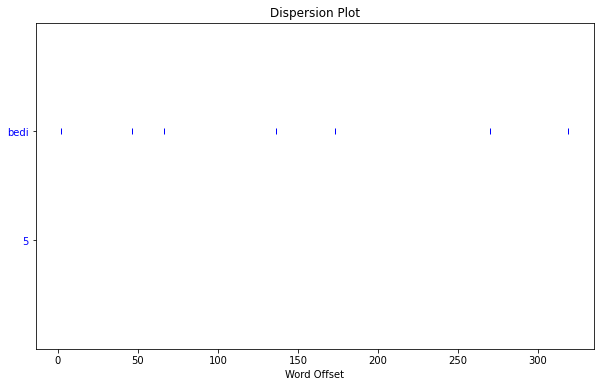

In [27]:
from nltk.draw.dispersion import dispersion_plot
import matplotlib.pyplot as plt
# the following command can be used to increase the size of the plot using width and hight specifications

# Dispersion Plot
plt.figure(figsize=(10, 6))
targets=lst2
dispersion_plot(text_punc.split(), targets, ignore_case=True, title='Dispersion Plot')